In [1]:
import IPython.display as ipd
filepath = '/kaggle/input/urbansound8k/fold3/102105-3-0-0.wav'
ipd.Audio(filepath)

The Audio is allied to Dog barking category

# Wave Show Using Librosa

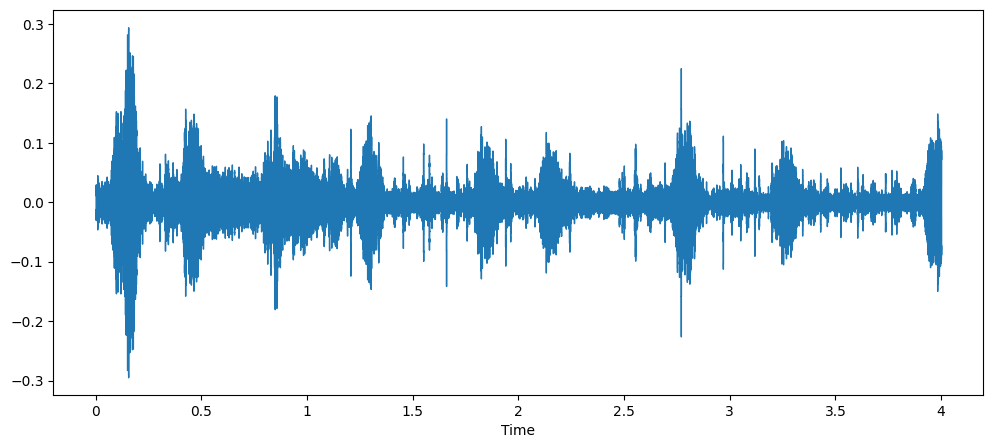

In [2]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
data , sample_rate = librosa.load(filepath)
plt.figure(figsize=(12,5))
librosa.display.waveshow(data, sr=sample_rate)

# Wave Show Using Scipy


44100
[[   76 -1034]
 [ -169 -1034]
 [ -547 -1092]
 ...
 [ 5538  -354]
 [ 5498   -67]
 [ 5269   312]]


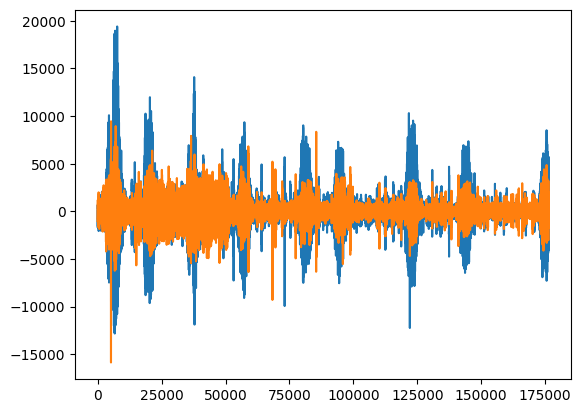

In [3]:
from scipy.io import wavfile as wav
wave_sample_rate , wave_audio = wav.read(filepath)
print(wave_sample_rate)
print(wave_audio)
plt.plot(wave_audio)

# Metadata Read to look into class labels

In [4]:
import pandas as pd
metadata = pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [5]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

# Data Preprocessing Using MFCCs


First, we will apply it on a single audio file 

In [6]:
mfccs = librosa.feature.mfcc(y=data, sr = sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 173)
[[-2.74524567e+02 -2.46964890e+02 -2.40361267e+02 ... -2.19329987e+02
  -2.18414948e+02 -2.17820816e+02]
 [ 8.14012299e+01  7.74209595e+01  8.13406219e+01 ...  1.16859711e+02
   1.13976654e+02  9.65637970e+01]
 [-3.39259148e+01 -3.64744110e+01 -5.11566086e+01 ... -5.13731766e+01
  -6.29509659e+01 -5.71873856e+01]
 ...
 [-5.18416309e+00 -1.41824257e+00  3.67195201e+00 ...  6.38549626e-01
  -5.71902335e-01  4.83798027e+00]
 [-1.20135765e+01 -1.12624245e+01 -4.61993885e+00 ... -3.03686929e+00
   3.28439474e-02 -2.44186431e-01]
 [ 2.18140578e+00 -3.86890507e+00 -6.66064739e+00 ... -1.50853133e+00
  -5.12778664e+00 -9.02797413e+00]]


In [7]:
pip install resampy

Note: you may need to restart the kernel to use updated packages.


In [8]:
def features_extractor(file):
   
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_best') #As audio quality is a critical concern, considering kaiser_best as higher-quality resampling method
    
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [9]:
import numpy as np
import resampy
from tqdm import tqdm
import os

# Check if the path exists
audio_dataset_path = '/kaggle/input/urbansound8k/'
if not os.path.exists(audio_dataset_path):
    raise FileNotFoundError(f"Audio dataset path '{audio_dataset_path}' does not exist.")

extracted_features = []

for index, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    
    # Check if the file exists before extracting features
    if os.path.exists(file_name):
        final_class_label = row["class"]
        data = features_extractor(file_name)
        extracted_features.append([data, final_class_label])
    else:
        print(f"File not found: {file_name}")

3555it [12:42,  4.52it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [29:29,  7.28it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [30:45,  4.73it/s]


Now you have a list of features and class labels in `extracted_features`

In [10]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-214.35951, 66.00463, -126.225266, -57.349598...",dog_bark
1,"[-420.23825, 103.904526, -47.55043, 55.606483,...",children_playing
2,"[-455.2568, 116.40811, -41.610703, 47.207104, ...",children_playing
3,"[-409.9394, 96.085556, -29.91929, 47.638355, 6...",children_playing
4,"[-442.84656, 108.39454, -47.178043, 55.187866,...",children_playing


In [11]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)

In [12]:
X_train.shape

(7858, 40)

In [13]:
y_train.shape

(7858, 10)

In [14]:
from tensorflow import keras 
import keras_tuner

# ANN Model

In [15]:
def build_model(hp):
    model = keras.Sequential()
    num_of_layer = hp.Int('num_of_layer', min_value=1, max_value=5, step=1)
    model.add(keras.layers.InputLayer(input_shape=(40,)))
    for i in range(num_of_layer):
        model.add(keras.layers.Dense(
            units=hp.Int(f'unit_{i}_layer', min_value=32, max_value=512, step=32),
            activation='relu'
        ))
        model.add(keras.layers.Dropout(
            rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
        ))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [16]:
tuner1 = keras_tuner.RandomSearch(hypermodel=build_model, objective='val_accuracy', max_trials=10, max_retries_per_trial=3,
                                directory = '/kaggle/working/',
                                 project_name='Audio_classification1')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [17]:
import tensorflow

In [18]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    tensorflow.keras.callbacks.TensorBoard(log_dir="./logs",histogram_freq=1,  # Frequency for histogram computation
    write_graph=True,  # Write the model graph
    write_images=True),
]

In [19]:
tuner1.search(X_train, y_train , epochs = 150, validation_data = (X_test, y_test), callbacks = callbacks)

Trial 10 Complete [00h 00m 09s]
val_accuracy: 0.6681922078132629

Best val_accuracy So Far: 0.9199084639549255
Total elapsed time: 00h 07m 05s


In [20]:
best_param = tuner1.get_best_hyperparameters(num_trials=1)[0]

In [21]:
model1 = tuner1.hypermodel.build(best_param)

In [22]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 288)            │        11,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 224)            │        64,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 288)            │        64,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 160)            │        46,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 448)            │        72,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         4,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,202 (1.01 MB)

 Trainable params: 264,202 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model1.fit(X_train, y_train ,epochs=100, validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.1716 - loss: 3.6778 - val_accuracy: 0.3696 - val_loss: 1.8076
Epoch 2/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2937 - loss: 2.0279 - val_accuracy: 0.4565 - val_loss: 1.6423
Epoch 3/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3497 - loss: 1.8463 - val_accuracy: 0.5240 - val_loss: 1.5022
Epoch 4/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4098 - loss: 1.6849 - val_accuracy: 0.5412 - val_loss: 1.3844
Epoch 5/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4499 - loss: 1.5704 - val_accuracy: 0.5584 - val_loss: 1.3060
Epoch 6/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4754 - loss: 1.4869 - val_accuracy: 0.5732 - val_loss: 1.2391
Epoch 7/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4896 - loss: 1.4536 - val_accuracy: 0.6030 - val_loss: 1.1817
Epoch 8/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5298 - loss: 1.3458 - val_ac

# Graph Between Accuracy and Val Accuracy

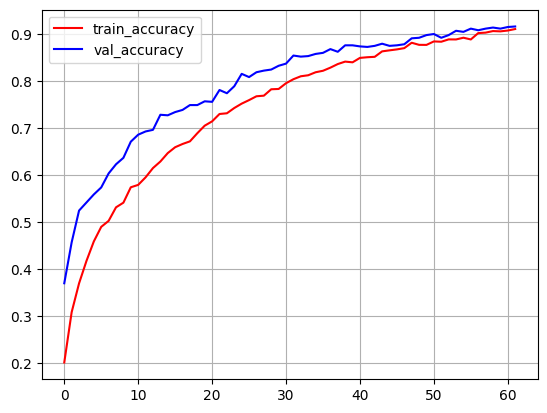

In [25]:
plt.plot(history.history['accuracy'], color = 'red',label = 'train_accuracy' )
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
plt.legend()
plt.grid()
plt.plot()
plt.show()

# Graph Between Loss and Val Loss

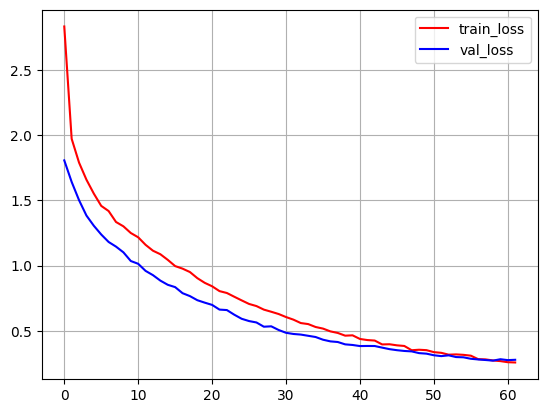

In [26]:
plt.plot(history.history['loss'], color = 'red', label = 'train_loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'val_loss')
plt.legend()
plt.grid()
plt.plot()
plt.show()

In [27]:
model1.save('my_ann_model.h5')

In [28]:
test_accuracy=model1.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9153317809104919


# Prediction

In [29]:
#model.predict_classes(X_test)
predict_x=model1.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[5 3 4 9 9 2 8 4 9 8 3 0 9 5 0 9 2 2 4 4 2 3 9 9 7 1 5 2 4 4 0 9 0 3 4 8 0
 8 9 2 8 1 2 4 4 4 9 2 4 8 9 3 8 3 8 7 4 2 9 0 7 7 6 9 7 2 9 5 2 3 4 2 7 3
 4 4 2 9 0 9 9 0 8 3 3 3 3 9 9 5 3 3 8 6 4 5 2 7 3 9 0 1 7 9 5 8 5 1 0 0 2
 1 4 7 0 1 5 3 4 7 4 1 4 0 8 3 3 3 7 5 5 4 0 3 9 4 0 9 8 4 9 3 5 4 0 2 3 4
 5 6 2 8 9 2 3 8 7 0 2 3 7 5 3 8 7 8 6 9 9 3 2 4 1 9 3 8 8 9 7 6 7 3 5 1 2
 8 2 8 1 5 5 1 2 5 0 1 2 9 2 4 7 2 3 4 3 8 3 9 7 5 5 8 9 2 6 7 5 5 1 5 8 0
 0 9 3 8 4 6 8 3 7 9 1 2 0 4 9 9 9 8 7 8 7 5 8 7 4 6 3 4 5 4 4 2 5 8 7 2 3
 3 9 5 5 3 5 0 2 7 5 5 8 9 4 9 7 5 5 8 0 8 1 7 4 4 7 2 0 6 4 2 7 9 8 5 9 7
 8 9 0 4 3 7 3 5 9 8 5 2 3 9 8 8 3 3 2 1 7 0 5 7 9 0 8 5 9 4 8 5 5 7 9 2 3
 3 7 4 5 8 4 9 7 8 5 0 0 2 9 5 3 2 5 5 0 1 4 9 8 4 4 1 5 0 2 3 6 1 2 2 1 4
 2 5 5 2 7 0 5 4 0 0 0 6 4 4 2 5 5 4 3 8 7 8 5 7 9 9 8 5 6 4 0 0 5 4 4 5 0
 2 8 7 0 6 5 6 7 0 7 7 1 5 3 0 7 4 9 2 9 8 9 9 2 4 9 3 5 8 7 5 2 8 1 0 7 5
 4 2 2 3 7 7 9 1 7 1 0 0 2 7 1 0 6 6 0 0 9 4 9 5 2 6 3 2 5 5 

# Prediction on random audio sample

In [30]:
filename="/kaggle/input/urbansound8k/fold1/103074-7-0-2.wav"
#preprocess the audio file
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#Reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#predicted_label=model.predict_classes(mfccs_scaled_features)
x_predict=model1.predict(mfccs_scaled_features) 
predicted_label=np.argmax(x_predict,axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
[7]
['jackhammer']


In [31]:
pip install --upgrade scipy

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 39.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.2 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post

In [32]:
import IPython.display as ipd
import librosa
import librosa.display
import scipy
from matplotlib import pyplot as plt
from scipy.io import wavfile as wav
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import keras_tuner
import tensorflow as tf
import imgaug.augmenters as iaa

# Audio Feature Extraction with Data Augmentation

The code effectively extracts features and creates a DataFrame for subsequent analysis or machine learning tasks.

In [33]:
import librosa
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

# Function for audio feature extraction with data augmentation
def extract_features_with_augmentation(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_best')
    
    augmented_features = []
    
    # Perform data augmentation
    for _ in range(5):  # Augment 5 times for each audio file
        # Pitch shifting (between -2 and 2 semi-tones)
        semi_tone_steps = np.random.uniform(-2.0, 2.0)
        augmented_audio_pitch = librosa.effects.pitch_shift(audio, sr=sample_rate, n_steps=semi_tone_steps)
        
        # Time stretching by resampling
        speed_factor = np.random.uniform(0.8, 1.2)
        resampled = librosa.resample(augmented_audio_pitch, orig_sr=sample_rate, target_sr=int(sample_rate * speed_factor))
        
        # Adding white noise
        noise = np.random.normal(0, 0.005, len(resampled))
        augmented_audio = resampled + noise
        
        # Extract MFCC features
        mfccs_features = librosa.feature.mfcc(y=augmented_audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        
        augmented_features.append(mfccs_scaled_features)
    
    return augmented_features

# Load metadata
metadata = pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')

# Extract features and perform data augmentation
extracted_features = []

for index, row in tqdm(metadata.iterrows()):
    file_name = os.path.join('/kaggle/input/urbansound8k/', 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))

    if os.path.exists(file_name):
        final_class_label = row["class"]
        data = extract_features_with_augmentation(file_name)
        extracted_features.extend([(feature, final_class_label) for feature in data])
    else:
        print(f"File not found: {file_name}")

# Create a DataFrame from the extracted features
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

2121it [20:03,  2.29it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2029
  warnings.warn(
2123it [20:03,  3.57it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1977
  warnings.warn(
2208it [20:54,  1.71it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1921
  warnings.warn(
3430it [32:23,  1.73it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1938
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1972
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input sig

In [34]:
extracted_features_df['class'].value_counts()

class
dog_bark            5000
children_playing    5000
air_conditioner     5000
street_music        5000
jackhammer          5000
engine_idling       5000
drilling            5000
siren               4645
car_horn            2145
gun_shot            1870
Name: count, dtype: int64

In [35]:
# Convert features and labels to numpy arrays
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

# Perform label encoding
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [36]:
# Function to build the model using Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    num_of_layer = hp.Int('num_of_layer', min_value=1, max_value=5, step=1)
    model.add(keras.layers.InputLayer(input_shape=(40,)))
    for i in range(num_of_layer):
        model.add(keras.layers.Dense(
            units=hp.Int(f'unit_{i}_layer', min_value=32, max_value=512, step=32),
            activation='relu'
        ))
        model.add(keras.layers.Dropout(
            rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
        ))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [37]:
# Initialize Keras Tuner
tuner2 = keras_tuner.RandomSearch(hypermodel=build_model, objective='val_accuracy', max_trials=10, max_retries_per_trial=3,
                                directory='/kaggle/working/', project_name='Audio_classification2')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [38]:
# Define callbacks for training
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1, write_graph=True, write_images=True),
]

In [39]:
# Search for the best hyperparameters
tuner2.search(X_train, y_train, epochs=150, validation_data=(X_test, y_test), callbacks=callbacks)

Trial 10 Complete [00h 06m 37s]
val_accuracy: 0.9367842674255371

Best val_accuracy So Far: 0.9367842674255371
Total elapsed time: 00h 23m 55s


In [40]:
# Get the best hyperparameters and build the model
best_param = tuner2.get_best_hyperparameters(num_trials=1)[0]
model2 = tuner2.hypermodel.build(best_param)

In [41]:
# Train the model
history = model2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.1347 - loss: 4.7506 - val_accuracy: 0.3181 - val_loss: 2.0484
Epoch 2/100
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2296 - loss: 2.1480 - val_accuracy: 0.3889 - val_loss: 1.8266
Epoch 3/100
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3096 - loss: 1.9186 - val_accuracy: 0.4544 - val_loss: 1.6911
Epoch 4/100
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3672 - loss: 1.7659 - val_accuracy: 0.4858 - val_loss: 1.5747
Epoch 5/100
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4026 - loss: 1.6596 - val_accuracy: 0.5135 - val_loss: 1.4815
Epoch 6/100
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4427 - loss: 1.5673 - val_accuracy: 0.5421 - val_loss: 1.3695
Epoch 7/100
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4825 - loss: 1.4663 - val_accuracy: 0.5834 - val_loss: 1.2651
Epoch 8/100
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5187 - loss:

In [46]:
# Evaluate the model
test_accuracy = model2.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy[1]}")

Test accuracy: 0.9333485960960388


In [43]:
# Make predictions
predict_x = model2.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)
print(f"Predicted classes: {classes_x}")

137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted classes: [3 7 0 ... 7 5 8]


In [44]:
# Example for predicting on a new audio file
filename = "/kaggle/input/urbansound8k/fold1/103074-7-0-2.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

x_predict = model2.predict(mfccs_scaled_features)
predicted_label = np.argmax(x_predict, axis=1)
prediction_class = labelencoder.inverse_transform(predicted_label)
print(f"Predicted class for the new audio file: {prediction_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Predicted class for the new audio file: ['gun_shot']


In [47]:
model2.save("last_ann_model.h5")